In [2]:
pip install mlxtend --upgrade --no-deps

     |████████████████████████████████| 1.3 MB 5.3 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [3]:
import mlxtend                                                        
print(mlxtend.__version__) 

0.19.0


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
pip install tsne

     |████████████████████████████████| 547 kB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for tsne: filename=tsne-0.3.1-cp37-cp37m-linux_x86_64.whl size=260570 sha256=bf21702540665e7f7c9a58fff25ca1260b74e22d6aae29e89b798f1d5a525ca7
  Stored in directory: /root/.cache/pip/wheels/b9/a7/9d/d09b0eef66f28be09470e0e18629ae08aed772497b218f84f3
Successfully built tsne


In [6]:
import keras
import tensorflow
import numpy as np
from numpy.random import RandomState
np.random.seed(1)

from tsne import bh_sne
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

import os
import os.path
import glob

from keras.preprocessing import image

In [ ]:
################################## Train images

In [ ]:
imagedir_train = 'path to train data'

In [ ]:
cur_dir = os.getcwd()
os.chdir(imagedir_train)  # the parent folder with sub-folders

# Get number of samples per family
list_fams = sorted(os.listdir(os.getcwd()), key=str.lower)  # vector of strings with family names
no_imgs = []  # No. of samples per family
for i in range(len(list_fams)):
    os.chdir(list_fams[i])
    len1 = len(glob.glob('*'))  # assuming the images are stored as 'jpg'
    no_imgs.append(len1)
    os.chdir('..')
num_samples = np.sum(no_imgs)  # total number of all samples

# Compute the labels
y_train = np.zeros(num_samples)
pos = 0
label = 0
for i in no_imgs:
    print ("Label:%2d\tFamily: %15s\tNumber of images: %d" % (label, list_fams[label], i))
    for j in range(i):
        y_train[pos] = label
        pos += 1
    label += 1
num_classes = label

# Compute the features
width, height,channels = (224,224,3)
X_train = np.zeros((num_samples, width, height, channels))
cnt = 0
list_paths = [] # List of image paths
print("Processing images ...")
for i in range(len(list_fams)):
  for img_file in glob.glob(list_fams[i]+'/*'):
        #print("[%d] Processing image: %s" % (cnt, img_file))
        list_paths.append(os.path.join(os.getcwd(),img_file))
        img = image.load_img(img_file, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        X_train[cnt] = x
        cnt += 1
  print(i)
print("Images processed: %d" %(cnt))

os.chdir(cur_dir)
np.save("path to save train_labels.npy", y_train)

Label: 0	Family:             gan	Number of images: 2400
Label: 1	Family:        graphics	Number of images: 2400
Label: 2	Family:            real	Number of images: 2400
Processing images ...
0
1
2
Images processed: 7200


In [ ]:
X_train.shape

(7200, 224, 224, 3)

In [ ]:
y_train.shape

(7200,)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],-1))
X_train.shape

(7200, 150528)

In [ ]:
X_train_1 = X_train[0:2400,:]
X_train_1.shape

(2400, 150528)

In [ ]:
X_train_2 = X_train[2400:4800,:]
X_train_2.shape

(2400, 150528)

In [ ]:
X_train_3 = X_train[4800:7200,:]
X_train_3.shape

(2400, 150528)

In [ ]:
np.save("path to save train data part1.npy", X_train_1)

In [ ]:
np.save("path to save train data part2.npy", X_train_2)

In [ ]:
np.save("path to save train data part3.npy", X_train_3)

In [ ]:
X_train_1 = np.load("path to train data part1.npy")
X_train_1.shape

(2400, 150528)

In [ ]:
print("Running t-SNE ...")
vis_train_1 = bh_sne(np.float64(X_train_1), d=2, perplexity=30., theta=0.5, random_state=RandomState(1))

np.save("path to save tsne features of train data tsne_part1.npy", vis_train_1)

Running t-SNE ...


In [ ]:
vis_train_1.shape

(2400, 2)

In [ ]:
X_train_2 = np.load("path to train data part2.npy")
X_train_2.shape

(2400, 150528)

In [ ]:
print("Running t-SNE ...")
vis_train_2 = bh_sne(np.float64(X_train_2), d=2, perplexity=30., theta=0.5, random_state=RandomState(1))

np.save("path to save tsne features of train data tsne_part2.npy", vis_train_2)

Running t-SNE ...


In [ ]:
vis_train_2.shape

(2400, 2)

In [ ]:
X_train_3 = np.load("path to train data part3.npy")
X_train_3.shape

(2400, 150528)

In [ ]:
print("Running t-SNE ...")
vis_train_3 = bh_sne(np.float64(X_train_3), d=2, perplexity=30., theta=0.5, random_state=RandomState(1))

np.save("path to save tsne features of train data tsne_part3.npy", vis_train_3)

Running t-SNE ...


In [ ]:
vis_train_3.shape

(2400, 2)

In [ ]:
############## Validation images

In [ ]:
imagedir_val = 'path to validation data'

In [ ]:
cur_dir = os.getcwd()
os.chdir(imagedir_val)  # the parent folder with sub-folders

# Get number of samples per family
list_fams = sorted(os.listdir(os.getcwd()), key=str.lower)  # vector of strings with family names
no_imgs = []  # No. of samples per family
for i in range(len(list_fams)):
    os.chdir(list_fams[i])
    len1 = len(glob.glob('*'))  # assuming the images are stored as 'jpg'
    no_imgs.append(len1)
    os.chdir('..')
num_samples = np.sum(no_imgs)  # total number of all samples

# Compute the labels
y_val = np.zeros(num_samples)
pos = 0
label = 0
for i in no_imgs:
    print ("Label:%2d\tFamily: %15s\tNumber of images: %d" % (label, list_fams[label], i))
    for j in range(i):
        y_val[pos] = label
        pos += 1
    label += 1
num_classes = label

# Compute the features
width, height,channels = (224,224,3)
X_val = np.zeros((num_samples, width, height, channels))
cnt = 0
list_paths = [] # List of image paths
print("Processing images ...")
for i in range(len(list_fams)):
  for img_file in glob.glob(list_fams[i]+'/*'):
        #print("[%d] Processing image: %s" % (cnt, img_file))
        list_paths.append(os.path.join(os.getcwd(),img_file))
        img = image.load_img(img_file, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        X_val[cnt] = x
        cnt += 1
  print(i)
print("Images processed: %d" %(cnt))

os.chdir(cur_dir)

np.save("path to save validation_labels.npy", y_val)

Label: 0	Family:             gan	Number of images: 800
Label: 1	Family:        graphics	Number of images: 800
Label: 2	Family:            real	Number of images: 800
Processing images ...
0
1
2
Images processed: 2400


In [ ]:
X_val.shape

(2400, 224, 224, 3)

In [ ]:
y_val.shape

(2400,)

In [ ]:
X_val = np.reshape(X_val,(X_val.shape[0],-1))
X_val.shape

(2400, 150528)

In [ ]:
np.save("path to save validation_feature.npy", X_val)

In [ ]:
X_val = np.load("path to validation_feature.npy")

In [ ]:
print("Running t-SNE ...")
vis_val = bh_sne(np.float64(X_val), d=2, perplexity=30., theta=0.5, random_state=RandomState(1))

np.save("path to save tsne_validation_feature.npy", vis_val)

Running t-SNE ...


In [ ]:
vis_val.shape

In [ ]:
############################### Test images

In [ ]:
imagedir_test = 'path to test data'

In [ ]:
cur_dir = os.getcwd()
os.chdir(imagedir_test)  # the parent folder with sub-folders

# Get number of samples per family
list_fams = sorted(os.listdir(os.getcwd()), key=str.lower)  # vector of strings with family names
no_imgs = []  # No. of samples per family
for i in range(len(list_fams)):
    os.chdir(list_fams[i])
    len1 = len(glob.glob('*'))  # assuming the images are stored as 'jpg'
    no_imgs.append(len1)
    os.chdir('..')
num_samples = np.sum(no_imgs)  # total number of all samples

# Compute the labels
y_test = np.zeros(num_samples)
pos = 0
label = 0
for i in no_imgs:
    print ("Label:%2d\tFamily: %15s\tNumber of images: %d" % (label, list_fams[label], i))
    for j in range(i):
        y_test[pos] = label
        pos += 1
    label += 1
num_classes = label

# Compute the features
width, height,channels = (224,224,3)
X_test = np.zeros((num_samples, width, height, channels))
cnt = 0
list_paths = [] # List of image paths
print("Processing images ...")
for i in range(len(list_fams)):
  for img_file in glob.glob(list_fams[i]+'/*'):
        #print("[%d] Processing image: %s" % (cnt, img_file))
        list_paths.append(os.path.join(os.getcwd(),img_file))
        img = image.load_img(img_file, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        X_test[cnt] = x
        cnt += 1
  print(i)
print("Images processed: %d" %(cnt))

os.chdir(cur_dir)

np.save("path to save test_labels.npy", y_test)

Label: 0	Family:             gan	Number of images: 800
Label: 1	Family:        graphics	Number of images: 800
Label: 2	Family:            real	Number of images: 800
Processing images ...
0
1
2
Images processed: 2400


In [ ]:
X_test.shape

(2400, 224, 224, 3)

In [ ]:
y_test.shape

(2400,)

In [ ]:
X_test = np.reshape(X_test,(X_test.shape[0],-1))
X_test.shape

(2400, 150528)

In [ ]:
np.save("path to save test_features.npy", X_test)

In [ ]:
X_test = np.load("path to test_features.npy")

In [ ]:
print("Running t-SNE ...")
vis_test = bh_sne(np.float64(X_test), d=2, perplexity=30., theta=0.5, random_state=RandomState(1))

np.save("path to save tsne_test_features.npy", vis_test)


Running t-SNE ...


In [ ]:
vis_test.shape

(2400, 2)

In [ ]:
vis_rgb_train_1 = np.load("path to tsne features of train data tsne_part1.npy")
vis_rgb_train_2 = np.load("path to tsne features of train data tsne_part2.npy")
vis_rgb_train_3 = np.load("path to tsne features of train data tsne_part3.npy")
vis_rgb_val = np.load("path to tsne_validation_feature.npy")
vis_rgb_test = np.load("path to tsne_test_features.npy")

In [ ]:
X = np.append(vis_rgb_train_1, vis_rgb_train_2, axis=0)
X = np.append(X, vis_rgb_train_3, axis=0)
X = np.append(X, vis_rgb_val, axis=0)
X = np.append(X, vis_rgb_test, axis=0)

np.save("path to save raw_image_tsne_features.npy", X)

X.shape

(12000, 2)

In [ ]:
y1 = np.load("path to train_labels.npy")
y2 = np.load("path to validation_labels.npy")
y3 = np.load("path to test_labels.npy")

In [ ]:
y = np.append(y1, y2, axis=0)
y = np.append(y, y3, axis=0)

np.save("path to save raw_image_labels.npy", y)

y.shape

(12000,)

In [7]:
list_fams = ['gan', 'graphics', 'real']
list_fams

['gan', 'graphics', 'real']

In [8]:
X = np.load("path to save raw_image_tsne_features.npy")
y = np.load("path to save raw_image_labels.npy")

Plotting t-SNE ...


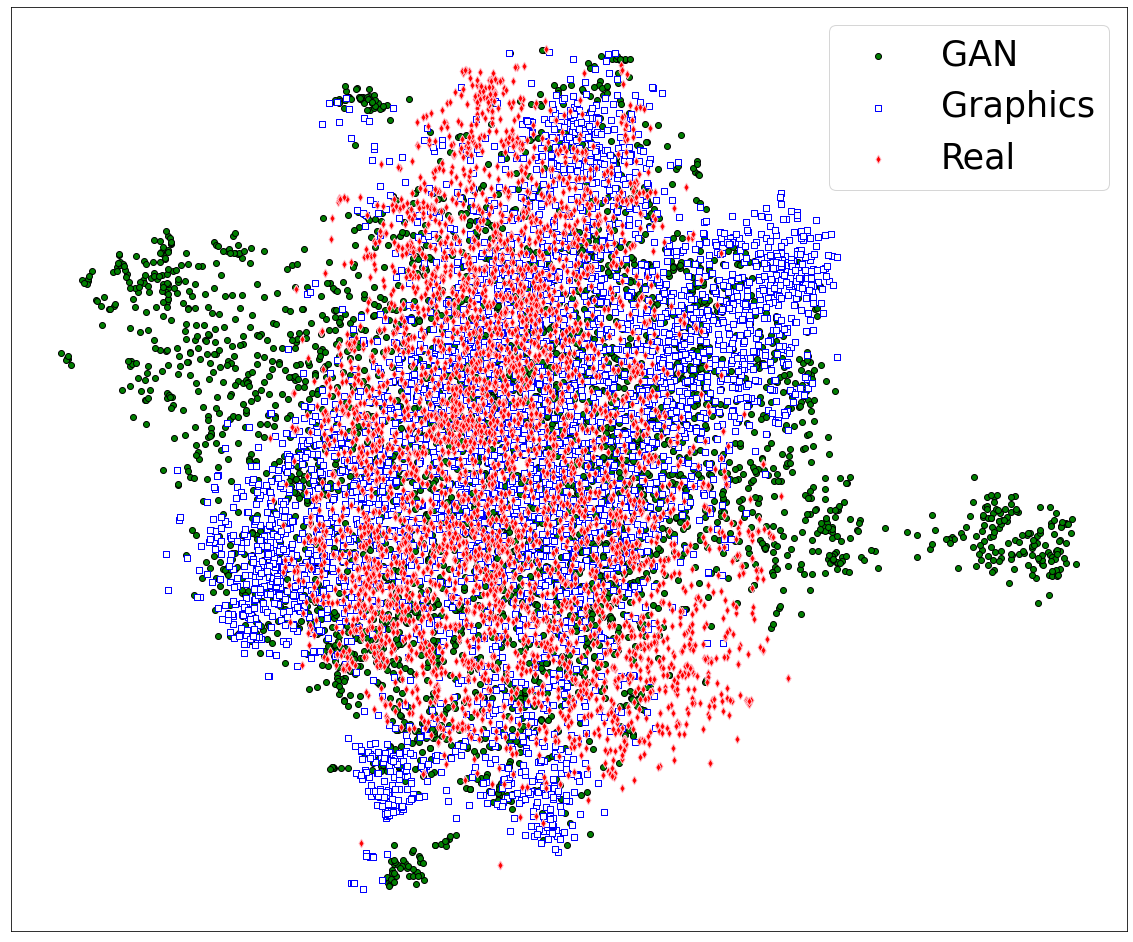

In [12]:
print("Plotting t-SNE ...")
figure = plt.gcf()
figure.set_size_inches(20, 17)
plt.scatter(X[y.astype(int)==0, 0], X[y.astype(int)==0, 1], c='green', marker='o', edgecolors="black", label="GAN")
plt.scatter(X[y.astype(int)==1, 0], X[y.astype(int)==1, 1], c='white', marker='s', edgecolors="blue", label="Graphics")
plt.scatter(X[y.astype(int)==2, 0], X[y.astype(int)==2, 1], c='red', marker='d', edgecolors="pink", label="Real")
plt.clim(-0.5, len(list_fams)-0.5)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
plt.legend(loc="upper right", prop={'size': 35})
#plt.savefig('/content/gdrive/MyDrive/tsne/TSNE_rgbimage_visualization_color_size_20_17.jpg', format='jpg')                  
plt.show()